In [7]:
# Import the required modules
#%pylab inline 
import cv2
from IPython.display import clear_output

import sys
import os
from PIL import Image, ImageDraw
import pylab

In [8]:
# The function of face and eye detection
import cv2
def det(frame):
    np_frame = frame

    face_cascade = cv2.CascadeClassifier(
        '/home/xilinx/jupyter_notebooks/base/video/data/'
        'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(
        '/home/xilinx/jupyter_notebooks/base/video/data/'
        'haarcascade_eye.xml')

    gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = np_frame[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    # Output OpenCV results via matplotlib
    %matplotlib inline 
    from matplotlib import pyplot as plt
    import numpy as np
    plt.imshow(np_frame[:,:,[2,1,0]])
    plt.show()

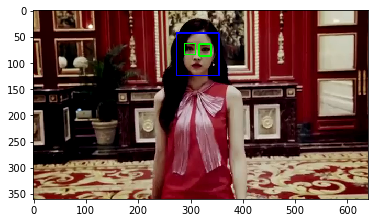

In [9]:
# Grab the input device, in this case the webcam
# You can also give path to the video file
vid = cv2.VideoCapture("/home/xilinx/jupyter_notebooks/OpenCV/Face Detection/2.mp4")

# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print ("Released Video Resource")
            break
        det(frame)
        
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()